In [5]:
import os
import numpy as np
import pandas as pd
from datetime import date, timedelta

import colorcet as cc
from cmcrameri import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import proplot as pplt

#warning
import warnings
warnings.filterwarnings('ignore')

os.chdir('D:/Xanthos-Repo/Data')

In [6]:
#############################################################
basinName = pd.read_csv('BasinNames235.txt')
basin_id = pd.read_csv('basin.csv')
GRDC_xanthosCoordIndx = pd.read_csv('GRDC_stations_list.csv')
basins94 = np.array(GRDC_xanthosCoordIndx['basins']).astype(np.int64)
xanthosid = np.array(GRDC_xanthosCoordIndx['xanthosID_new_adj']).astype(np.int64)
basinName_94 = [basinName['Basin_Name'][basins94[ii] - 1] for ii in range(GRDC_xanthosCoordIndx.shape[0])]

In [7]:
def runoff_model_output(dir_in, basin_num):
    #os.chdir(dir_in)
    basin_calibration =  pd.read_csv(dir_in + '\\basin_calibration_' + str(basin_num) + 'c.csv')
    basin_calibration = basin_calibration.drop(['para',	'parb',	'parc',	'pard',	'parm'], 1)
    ## basin_abcd
    basin_abcd = basin_calibration[['simulation1_1', 'simulation1_2', 'simulation1_3', 'simulation1_4', 'simulation1_5']]
    basin_abcd.columns = ['par_a',	'par_b',	'par_c',	'par_d',	'par_m']

    return basin_abcd


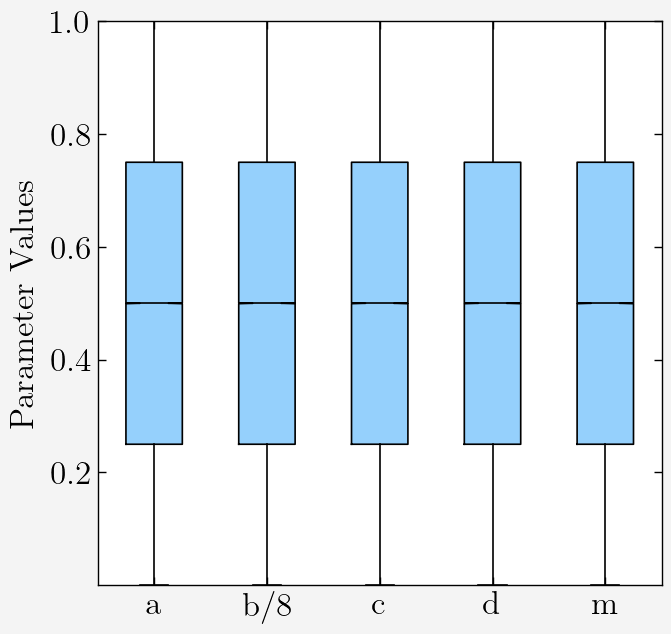

In [8]:
start_yr = 1971
ending_yr = 1990
dir_in = 'D:\\Xanthos-Repo\\Data\\WATCH-1M-Run-abcdm'

SAVE_KWDS = {"bbox_inches": "tight", "dpi": 450, "facecolor": "w"}
BASE_PLOT = {"facecolor": 'none', "edgecolor": 'k', "alpha": 0.9,}
plt.rcParams['figure.autolayout'] = True 
plt.rcParams.update({'font.size': 12}) 

basin_num = 6
bb = np.where(basins94==basin_num)[0]
## Get data : simulated   
basin_abcd = runoff_model_output(dir_in, basin_num)
basin_abcd['par_b'] = basin_abcd['par_b']/8
basin_abcd.columns = ['a','b','c','d','m']
##################################################
plt.style.use('science')
with plt.style.context(['science', 'high-contrast']):
    fig, axs = pplt.subplots(nrows=1, ncols=1,  share=1, journal='pnas1')
    ax = axs[0]
    ax.boxplot(np.array(basin_abcd), notch=True ,facecolor='light blue')
    ax.set_xticklabels(['a','b/8','c','d','m'])
    ax.autoscale(tight=True)      
    ax.format(ylabel='Parameter Values' , fontsize= 12)  
    ax.format(ylabel='Parameter Values', abcstyle=False,  grid=False)   
    ax.minorticks_off()


plt.tight_layout()   
#dir_out = 'D:\\Xanthos-Repo\\figures\\'
#plt.savefig(dir_out + "Figure-5.png", **SAVE_KWDS)  